In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

settings_path = "./settings.json"
jobs = pd.read_csv("./jobs.csv")
settings = utils.read_settings_from_file(settings_path)
jobs = utils.clean_up(jobs, settings)

In [5]:
def get_coverage(skill, jobs, return_idx:bool = False) -> str:
    counter = 0
    idx = []
    for i in range(len(jobs)):
        if type(skill) == list:
            for name in skill:
                name = name.strip().lower()
                if (name in str(jobs.loc[i, "description"])) or (name in str(jobs.loc[i, "skills"])): 
                    counter += 1
                    idx.append(i)
                    break
        else:
            skill = skill.strip().lower()
            if (skill in str(jobs.loc[i, "description"])) or (skill in str(jobs.loc[i, "skills"])): 
                counter += 1
                idx.append(i)
    if return_idx:
        return counter/len(jobs), idx
    return counter/len(jobs)

skill = "python"
get_coverage(skill, jobs)

0.43009320905459386

In [6]:
def get_multi_coverage(skills, jobs):
    collection = dict()
    for skill in skills: 
        skill_name = skill
        if type(skill) == list:
            skill_name = skill[0]
        collection.update({skill_name:get_coverage(skill, jobs)})

    collection = dict(sorted(collection.items(), key=lambda item: item[1], reverse=True))
    fig, ax = plt.subplots()
    bar_container = ax.bar(collection.keys(), collection.values())
    ax.set(ylabel='Coverage', title='Skills coverage', ylim=(0, 1))
    ax.bar_label(bar_container, fmt=lambda x: f'{x * 100:.2f}%', rotation=75)
    plt.xticks(rotation=75)
    plt.savefig("barchart")
    return collection

{'python': 0.43009320905459386,
 'git': 0.40878828229027964,
 'statistics': 0.20239680426098536,
 'sql': 0.19973368841544606,
 'aws': 0.16245006657789615,
 'azure': 0.1318242343541944,
 'java': 0.12516644474034622,
 'torch': 0.08788282290279627,
 'c++': 0.08255659121171771,
 'gcp': 0.0758988015978695,
 'tensorflow': 0.06657789613848203,
 'kubernetes': 0.05858854860186418,
 'docker': 0.05193075898801598,
 'keras': 0.015978695073235686,
 'pyspark': 0.014647137150466045,
 'langchain': 0.009320905459387484}

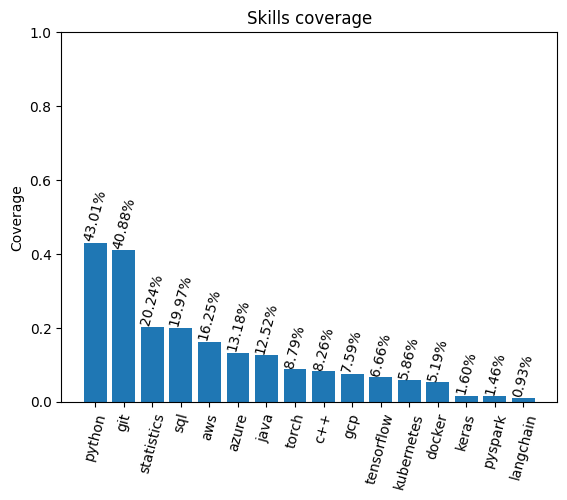

In [ ]:
skills = settings["skills"]
get_multi_coverage(skills, jobs)